In [35]:
import numpy as np

In [36]:
data = np.genfromtxt('./ASTR19_F24_group_project_data.txt', dtype=[('day', 'i8'), ('time', 'U6'), ('height', 'f8')])

day = []
time = []
height = []

for i in range(82):
    day.append(data[i][0])
    time.append(data[i][1])
    height.append(data[i][2])

print(day)
print('')
print(time)
print('')
print(height)

[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41]

['8:07', '15:37', '8:55', '16:25', '9:45', '17:14', '10:35', '18:00', '11:28', '18:46', '12:22', '19:31', '13:24', '20:16', '3:22', '21:01', '4:07', '21:46', '4:50', '11:58', '5:31', '12:56', '6:08', '13:45', '6:47', '14:25', '7:22', '15:00', '7:59', '15:34', '8:34', '16:08', '9:10', '16:41', '9:45', '17:12', '10:21', '17:45', '10:57', '18:15', '11:38', '18:48', '12:25', '19:20', '2:22', '19:52', '2:58', '20:30', '3:37', '10:44', '4:23', '11:55', '5:15', '12:57', '6:09', '13:50', '7:05', '14:39', '7:58', '15:27', '8:50', '16:10', '9:40', '16:52', '10:30', '17:34', '11:19', '18:12', '12:10', '18:49', '1:32', '19:24', '2:13', '20:00', '2:54', '9:54', '3:39', '11:15', '4:29', '12:22

In [37]:
percents = []
for times in time:
    hourmin = times.split(':')
    percent = (float(hourmin[0]) + float(hourmin[1])/60) /24
    percents.append(percent)
daytime = [percent + daynum for percent, daynum in zip(percents, day)]

In [38]:
import matplotlib.pyplot as plt

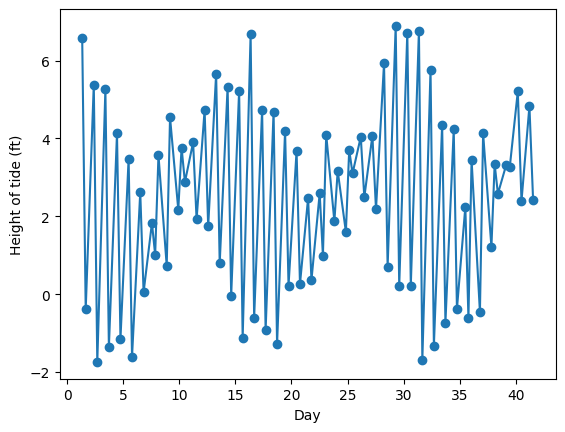

In [39]:
plt.plot(daytime, height, '-o')
plt.xlabel('Day')
plt.ylabel('Height of tide (ft)')
plt.show()

In [40]:
from scipy import optimize

In [41]:
def f_tide(x, a, b, c, d, e, f, g):
    """A more complex tidal model function."""
    return (a * np.sin(b * x + c)) + (d * np.sin(e * x + f)) + g


a_est = ((max(height) - min(height)) / 2)

d_est = a_est / 2

b_est = 2*np.pi

e_est = np.pi/15

c_est = 0
f_est = 0
g_est = np.mean(height)

print(a_est, b_est, c_est, d_est, e_est, f_est, g_est)

initial_params = [a_est, b_est, c_est, d_est, e_est, f_est, g_est]

params, params_cov = optimize.curve_fit(
    f_tide, daytime, height, sigma=np.full(len(daytime), 0.25),
    p0=initial_params,

)

a_fit, b_fit, c_fit, d_fit, e_fit, f_fit, g_fit = params

print(a_fit, b_fit, c_fit, d_fit, e_fit, f_fit, g_fit)

height_fit = f_tide(np.array(daytime), a_fit, b_fit, c_fit, d_fit, e_fit, f_fit, g_fit)

print(height_fit)

4.3149999999999995 6.283185307179586 0 2.1574999999999998 0.20943951023931953 0 2.4782926829268295
2.9720977695740576 6.282922948545966 -0.09641267146433914 -0.183219660387286 0.20046382055897646 -0.5471983350831522 2.4810342245958465
[ 5.19808684  0.28748549  4.83013105 -0.1087996   4.33974292 -0.39604761
  3.76134596 -0.54909477  3.08431451 -0.58061973  2.36128651 -0.49310195
  1.54273373 -0.29103353  4.41525745  0.01793882  4.77145455  0.42204298
  5.03052432  2.61787991  5.19602576  1.87212234  5.27410497  1.26980455
  5.28000244  0.82128122  5.22098929  0.47450042  5.09054317  0.18530768
  4.90824112 -0.05170637  4.66243034 -0.2264921   4.37373292 -0.33712588
  4.03000402 -0.40112804  3.64760602 -0.40563924  3.17197212 -0.35904777
  2.59553389 -0.25954866  4.09851196 -0.11009025  4.50282595  0.12590646
  4.88065965  3.91363027  5.23379673  3.03508504  5.50015609  2.22838792
  5.6153554   1.55295802  5.55522737  0.97139452  5.3310921   0.46782149
  4.96458755  0.08741328  4.4915432

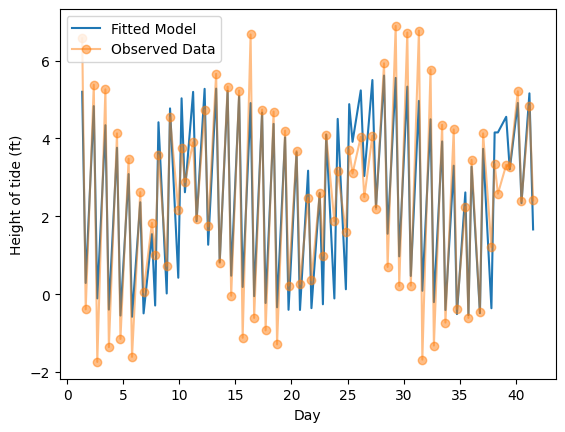

In [42]:
plt.plot(daytime, height_fit, label="Fitted Model")
plt.plot(daytime, height, '-o', label="Observed Data", alpha=0.5)
plt.xlabel('Day')
plt.ylabel('Height of tide (ft)')
plt.legend()
plt.show()

In [18]:
residuals = []
i = 0
while i < len(height):
    residuals.append(height[i] - height_fit[i])
    i += 1

print(residuals)
print(min(residuals), max(residuals))

[1.3719131615098359, -0.6774854886683447, 0.5498689505754912, -1.6312004013731427, 0.9202570757756572, -0.9639523944776405, 0.3686540429875276, -0.6009052289947885, 0.3956854853808087, -1.0293802713159794, 0.25871349441491276, 0.5431019500230059, 0.28726627329876897, 1.3010335265747528, -0.8452574482747512, 0.7120611762130555, -0.2314545483294994, 1.7479570160781743, -1.2705243154273465, 0.2621200931840715, -1.2960257571970843, 0.04787766382050984, -0.5441049729432255, 0.4701954547615643, 0.37999756111887883, -0.03128121720882415, 0.10901071071435098, -0.5145004240479345, 0.13945683288027766, -1.30530767774611, 1.7617588776220323, -0.5582936295890374, 0.07756966250233077, -0.7035079027479804, 0.3162670848611864, -0.9528741220589243, 0.16999597661458132, 0.6211280377746717, 0.03239398036036878, 0.6656392352634304, -0.7019721221004951, 0.7190477705011614, -0.005533892123398498, 1.2495486620617708, 0.0014880408962536507, 1.9800902525125061, -1.3328259541624217, 1.4740935410473575, -1.1706